# Εφαρμοσμένη Μηχανική Μάθηση 



> Μακρυγιάννης Ιάσων-Σωτήριος 8160066 <br />
> 3η Εργασία Μηχανικής Μάθησης<br />
> Υπεύθυνος Καθηγητής : Λουρίδας Παναγιώτης <br />



* Το πρόβλημα που καλούμαστε να λύσουμε, βασίζεται στα δεδομένα της Βουλής σχετικά με τις ολομέλειες που πραγματοποιούνται κατά περιόδους.Πώς ορίζονται αυτοί οι περίοδοι;
    * Σύμφωνα με τη [*βουλή*](https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/) μια ολομέλεια ορίζεται *« διάρκεια της τακτικής συνόδου δεν μπορεί να είναι μικρότερη από πέντε μήνες, σε αυτήν δε ψηφίζεται υποχρεωτικά ο προϋπολογισμός του Κράτους»*

* Ωστόσο στόχος μας είναι να μπορέσουμε μέσω της χρήσης μη-νευρωνικών και νευρωνικών δικτύων, να κάνουμε πρόβλεψη για κάθε ένα λόγο που ακούστηκε στην ολομέλεια και από ποιό κόμμα.<br />
* Η ανάλυση αυτής της διαδικασίας είναι δύσκολη, καθώς η πολιτική είναι ένα περίπλοκο πεδίο καθώς υπάρχει απο την μια το πολιτικό κόμμα που είναι κυβέρνηση, και απο την άλλη υπάρχουν τα κόμματα της αντιπολίτευσης.
* Με την παρακάτω προσπάθεια θα επιχειρήσουμε να βγάλουμε όσο καλύτερα γίνεται ένα καλό αποτέλεσμα πρόβλεψης της ομιλίας του κόμματος.
* Αρχίζοντας λοιπόν θα εισάγουμε κάποιες βασικές βιβλιοθήκες ώστε να διαχειριστούμε τα δεδομένα μας.


In [1]:

import pandas as pd
import numpy as np
import sklearn

* Ωστόσο βασικές βιβλιοθήκες αποτελούνται και εκείνες που θα μας βοηθήσουν να διαχειριστούμε τις λέξεις απο κάθε λόγο της ολομέλειας και να μπορούμε να κάνουμε προβλέψεις. Έτσι λοιπόν έχουμε τις εξείς: 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

* Ξεκινάμε διαβάζοντας το αρχείο με τα δεδομένα τις βουλής, τα οποία είναι καθαρισμένα και βρίσκονται στην [*υπάρχουσα σελίδα*](https://zenodo.org/record/2587904) του Zenodo.

In [2]:
data = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv')

In [62]:
data

member_name sitting_date  \
0        κρητικος νικολαου παναγιωτης   1989-07-03   
1        κρητικος νικολαου παναγιωτης   1989-07-03   
2        κρητικος νικολαου παναγιωτης   1989-07-03   
4        κρητικος νικολαου παναγιωτης   1989-07-03   
5        κρητικος νικολαου παναγιωτης   1989-07-04   
...                               ...          ...   
1194401     κακλαμανης μιχαηλ νικητας   2019-02-22   
1194402   συντυχακης δανιηλ εμμανουηλ   2019-02-22   
1194403     κακλαμανης μιχαηλ νικητας   2019-02-22   
1194404     κακλαμανης μιχαηλ νικητας   2019-02-22   
1194406     κακλαμανης μιχαηλ νικητας   2019-02-22   

                              parliamentary_period parliamentary_session  \
0                                         period 5             session 1   
1                                         period 5             session 1   
2                                         period 5             session 1   
4                                         period 5             session 1   
5                                         period 5             session 1   
...                                            ...                   ...   
1194401  period 17 presided parliamentary republic             session 4   
1194402  period 17 presided parliamentary republic             session 4   
1194403  period 17 presided parliamentary republic             session 4   
1194404  period 17 presided parliamentary republic             session 4   
1194406  period 17 presided parliamentary republic             session 4   

        parliamentary_sitting                 political_party speaker_info  \
0                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
1                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
2                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
4                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
5                   sitting 2  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
...                       ...                             ...          ...   
1194401            sitting 82                  νεα δημοκρατια   προεδρευων   
1194402            sitting 82     κομμουνιστικο κομμα ελλαδας          NaN   
1194403            sitting 82                  νεα δημοκρατια   προεδρευων   
1194404            sitting 82                  νεα δημοκρατια   προεδρευων   
1194406            sitting 82                  νεα δημοκρατια   προεδρευων   

                                                    speech  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...  
2         Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...  
4         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...  
5         Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...  
...                                                    ...  
1194401   Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...  
1194402   Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ...  
1194403             Ορίστε, κύριε Υπουργέ, έχετε τον λόγο.  
1194404   Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ...  
1194406   Με τη συναίνεση του Σώματος και ώρα 11.25΄ λύ...  

[1108535 rows x 8 columns]

# Data exploration
* Πριν συνεχίσουμε με την κύρια ανάλυση, θα δούμε λίγο σχετικά τι υπάρχουν μέσα στα δεδομένα μας κατα όλη τη διάρκεια των χρόνων
* Αρχικά θα φτιάξουμε μια νέα στήλη στην οποία θα έχουμε τις χρονιές που ειπώθηκε κάθε ομιλια


* Αρχικά θα δούμε τα κόμματα που υπάρχουν μέσα στο dataset μας! 

In [23]:
data['sitting_date'] = data['sitting_date'].astype('datetime64[ns]')
data['Year'] = data['sitting_date'].dt.year
data['Month'] = data['sitting_date'].dt.month


In [24]:
pd.options.display.max_columns = None

In [25]:
table = pd.pivot_table(data, values='speech', index=['member_name'],
                    columns=['Year'], aggfunc='count')
pd.set_option('display.max_rows', table.shape[0]+1)
table

Year                                                  1989    1990    1991  \
member_name                                                                  
αβραμιδης νικολαου γαβριηλ                             NaN     NaN     NaN   
αβραμοπουλος λαμπρου δημητριος                         NaN     NaN     NaN   
αγαθοπουλου δημητριου ειρηνη-ελενη                     NaN     NaN     NaN   
αγατσα αριστειδη αριαδνη                               NaN     NaN     NaN   
αγγελης στεφανου ανεστης                               NaN     NaN     NaN   
αγγελοπουλος κωνσταντινου νικολαος                     NaN    29.0    10.0   
αγγελουσης αθανασιου ευσταθιος                         NaN     NaN     NaN   
αγγουρακης γεωργιου χαραλαμπος                         NaN     NaN     NaN   
αγοραστος αναστασιου κωνσταντινος                      NaN     NaN     NaN   
αδαμοπουλος αθανασιου γεωργιος                         9.0    90.0   146.0   
αδρακτας φωτιου παναγιωτης                             1.0     1.0    36.0   
αηδονης ευαγγελου χρηστος                              NaN     NaN     NaN   
αθανασιαδης θεοδωρου αλεξανδρος                        NaN     NaN     NaN   
αθανασιου ευθυμιου αθανασιος (νασος)                   NaN     NaN     NaN   
αθανασιου χριστοφα χαραλαμπος                          NaN     NaN     NaN   
αθανασοπουλος ανδρεα νικολαος                          NaN     NaN     NaN   
αιβαλιωτης ιωαννη κωνσταντινος                         NaN     NaN     NaN   
αιβατιδης γεωργιου ιωαννης                             NaN     NaN     NaN   
ακηφογλου ακιφ μπηρολ                                  NaN     NaN     NaN   
ακριβακης δημητριου αλεξανδρος                        20.0     5.0    13.0   
ακριτα συζ.λουκη συλβα-καιτη                           NaN     4.0    20.0   
ακριτιδης βασιλειου νικολαος                          15.0    43.0   209.0   
ακριωτης κυριακου γεωργιος                             NaN     NaN     NaN   
αλαβανος νικολαου αλεξανδρος                           NaN     NaN     NaN   
αλαμπανος νικολαου δημητριος                           1.0    37.0    46.0   
αλεξανδριδου παυλου βασιλικη                           NaN     NaN     NaN   
αλεξοπουλος δημητριου χρυσοβαλαντης                    NaN     NaN     NaN   
αλεξοπουλος ιωαννη αποστολος                           NaN     NaN     NaN   
αλεξοπουλος λαμπρου γεωργιος                           NaN     NaN     NaN   
αλευρας γεωργιου αθανασιος (νασος)                     NaN     NaN     NaN   
αλευρας νικολαου ιωαννης                              24.0     5.0     NaN   
αλιβιζατος παυλου πετρος-παυλος                        NaN     NaN     NaN   
αλογοσκουφης σπυριψων γεωργιος                         NaN     NaN     NaN   
αλυσανδρακης εμμανουηλ κωνσταντινος                    NaN     NaN     NaN   
αλφιερη αντωνιου στυλιανη (στελλα)                     NaN     NaN     NaN   
αμανατιδης γεωργιου ιωαννης                            NaN     NaN     NaN   
αμμανατιδου-(πασχαλιδου) γεωργιου ευαγγελια (λι...     NaN     NaN     NaN   
αμοιριδης παναγιωτη ιωαννης                            NaN     NaN     NaN   
αμπατζογλου δημητριου γεωργιος                         NaN     NaN     NaN   
αμυρας στυλιανου γεωργιος                              NaN     NaN     NaN   
αναγνωστακης θεοδωρου δημητριος                        NaN     NaN     NaN   
αναγνωστοπουλος γεωργιου θεοδωρος                    824.0  2256.0  2227.0   
αναγνωστοπουλος δημητριου νικολαος                    16.0     NaN     NaN   
αναγνωστοπουλος θεοδωρου γεωργιος                      NaN     NaN     NaN   
αναγνωστοπουλου πετρου αθανασια (σια)                  NaN     NaN     NaN   
αναστασιαδης ιωαννη σαββας                             NaN     NaN     NaN   
αναστασοπουλος δημητριου νικολαος                      NaN     1.0     NaN   
ανατολακης στεφανου γεωργιος                           NaN     NaN     NaN   
ανδρεαδακη ηλια αναστασια                              NaN    53.0    74.0   
ανδρεουλακος γεωργιου 

* Απο αυτόν τον πίνακα μπορούμε να κρατήσουμε πως ορισμένοι βουλευτές ήταν παραπάνω απο μια τετρατετία ενώ διάφορετικά ονόματα κρατήσαν μόνο μια 4ετία

In [26]:
table = pd.pivot_table(data, values='speech', index=['political_party'],
                    columns=['Year'], aggfunc='count')
pd.set_option('display.max_rows', table.shape[0]+1)
table

Year                                                  1989     1990     1991  \
political_party                                                                
ανεξαρτητοι (εκτος κομματος)                           NaN    499.0    527.0   
ανεξαρτητοι δημοκρατικοι βουλευτες                     NaN      NaN      NaN   
ανεξαρτητοι ελληνες - πανος καμμενος                   NaN      NaN      NaN   
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...     NaN      NaN      NaN   
αντιπολιτευση                                          NaN      5.0      3.0   
βουλη                                                287.0   1088.0   1744.0   
δημοκρατικη ανανεωση                                   NaN      6.0      NaN   
δημοκρατικη αριστερα                                   NaN      NaN      NaN   
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικ...     NaN      NaN      NaN   
δημοκρατικο κοινωνικο κινημα                           NaN      NaN      NaN   
ενωση κεντρωων                                         NaN      NaN      NaN   
κομμουνιστικο κομμα ελλαδας                           93.0    112.0    149.0   
κομμουνιστικο κομμα ελλαδας εσωτερικου               202.0      NaN      NaN   
λαικη ενοτητα                                          NaN      NaN      NaN   
λαικος ορθοδοξος συναγερμος                            5.0      6.0      8.0   
λαικος συνδεσος - χρυση αυγη                           NaN      NaN      NaN   
νεα δημοκρατια                                      4741.0  16566.0  22121.0   
οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων ...     5.0     53.0    101.0   
πανελληνιο σοσιαλιστικο κινημα                      3959.0  12323.0  16414.0   
πολιτικη ανοιξη                                        NaN      NaN      NaN   
συνασπισμος ριζοσπαστικης αριστερας                    NaN      NaN      NaN   
συνασπισμος της αριστερας των κινηματων και της...  1252.0   5038.0   7196.0   
το ποταμι                                              NaN      NaN      NaN   

Year                                                   1992     1993     1994  \
political_party                                                                 
ανεξαρτητοι (εκτος κομματος)                         1740.0    564.0      NaN   
ανεξαρτητοι δημοκρατικοι βουλευτες                      NaN      NaN      NaN   
ανεξαρτητοι ελληνες - πανος καμμενος                    NaN      NaN      NaN   
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...      NaN      NaN      NaN   
αντιπολιτευση                                           1.0      NaN      NaN   
βουλη                                                1850.0   1453.0   1186.0   
δημοκρατικη ανανεωση                                    NaN      NaN      NaN   
δημοκρατικη αριστερα                                    NaN      NaN      NaN   
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικ...      NaN      NaN      NaN   
δημοκρατικο κοινωνικο κινημα                            NaN      NaN      NaN   
ενωση κεντρωων                                          NaN      NaN      NaN   
κομμουνιστικο κομμα ελλαδας                           128.0    177.0   2001.0   
κομμουνιστικο κομμα ελλαδας εσωτερικου                  NaN      NaN      NaN   
λαικη ενοτητα                                           NaN      NaN      NaN   
λαικος ορθοδοξος συναγερμος                            12.0      5.0      NaN   
λαικος συνδεσος - χρυση αυγη                            NaN      NaN      NaN   
νεα δημοκρατια                                      24569.0  18764.0   7127.0   
οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων ...     89.0     59.0      NaN   
πανελληνιο σοσιαλιστικο κινημα                      17076.0  17306.0  17735.0   
πολιτικη ανοιξη                                         NaN    297.0   3087.0   
συνασπισμος ριζοσπαστικης αριστερας                     NaN      NaN      NaN   
συνασπισμος της αριστερας των κινηματων και της...   8431.0   5209.0      NaN   
το ποταμι                                              

* Παρομοίως εδω πέρα βλέπουμε πως κάποια κόμματα πάλι έχουν κρατήσει για ορισμένο χρονικό πλαίσιο, ενώ κάποια κόμματα έχουν κρατήσει απο την πολύ αρχή μέχρι και σήμερα

In [28]:
pd.set_option('display.max_columns', None)
table = pd.pivot_table(data, values='speech', index=['speaker_info'],
                    columns=['Year'], aggfunc='count')
pd.set_option('display.max_rows', table.shape[0]+1)

table

Year                                                  1989    1990     1991  \
speaker_info                                                                  
α αντιπροεδρος                                         NaN     NaN      NaN   
α αντιπροεδρος της βουλης                              NaN     NaN      NaN   
α αντιπροεδρος της βουλης των ελληνων                  NaN     NaN      NaN   
α? αντιπροεδρος της βουλης                             NaN     NaN      NaN   
αθανασιος τσαλδαρης                                    NaN     1.0      NaN   
αναπληρωτης περιβαλλοντος, ενεργειας και κλιματ...     NaN     NaN      NaN   
αναπληρωτης υγειας                                     NaN     NaN      NaN   
αναπληρωτης υγειας και υπουργος κοινωνικων ασφα...     NaN     NaN      NaN   
αναπληρωτης υπουργο βιομηχανιας, ενεργειας και ...     NaN     NaN      NaN   
αναπληρωτης υπουργο περιβαλλοντος, ενεργειας κα...     NaN     NaN      NaN   
αναπληρωτης υπουργος αγροτικης αναπτυξης               NaN     NaN      NaN   
αναπληρωτης υπουργος αγροτικης αναπτυξης και τρ...     NaN     NaN      NaN   
αναπληρωτης υπουργος αγροτικης αναπτυξης και τρ...     NaN     NaN      NaN   
αναπληρωτης υπουργος αγροτικης αναπτυξης και τρ...     NaN     NaN      NaN   
αναπληρωτης υπουργος αμυνας                            NaN     NaN      NaN   
αναπληρωτης υπουργος αναπτυξης ανταγωνιστικοτητ...     NaN     NaN      NaN   
αναπληρωτης υπουργος αναπτυξης και τροφιμων            NaN     NaN      NaN   
αναπληρωτης υπουργος αναπτυξης, ανταγωνιστικοτη...     NaN     NaN      NaN   
αναπληρωτης υπουργος αναπτυξης, ανταγωνιστικοτη...     NaN     NaN      NaN   
αναπληρωτης υπουργος βιομηχανιας ενεργειας και ...     NaN     NaN      NaN   
αναπληρωτης υπουργος βιομηχανιας ενεργειας και ...     NaN     1.0      NaN   
αναπληρωτης υπουργος βιομηχανιας, ενεργειας και...     4.0     2.0      NaN   
αναπληρωτης υπουργος βιομηχανιας, ενεργειας και...     NaN     NaN      NaN   
αναπληρωτης υπουργος βιομηχανιας, ενεργειας και...     NaN     NaN      NaN   
αναπληρωτης υπουργος βιομηχανιας, ενεργειας και...     NaN     NaN      NaN   
αναπληρωτης υπουργος βιομηχανιας, ερευνας και τ...     NaN     NaN      NaN   
αναπληρωτης υπουργος γεωργιας                          NaN   129.0    113.0   
αναπληρωτης υπουργος γεωργιας η αγνοια ομως δυσ...     NaN     NaN      1.0   
αναπληρωτης υπουργος γεωργιας το ειπα πρωτυτερα...     NaN     NaN      1.0   
αναπληρωτης υπουργος γεωρσελιδα 753γιας                NaN     1.0      NaN   
αναπληρωτης υπουργος εθν. αμυνας                       NaN     NaN      1.0   
αναπληρωτης υπουργος εθν. παιδειας και θρησκευμ...     1.0     NaN      NaN   
αναπληρωτης υπουργος εθνικης αμυνας                   35.0     4.0     75.0   
αναπληρωτης υπουργος εθνικης αμυνης                    2.0     1.0      3.0   
αναπληρωτης υπουργος εθνικης οικονομιας               40.0     2.0      NaN   
αναπληρωτης υπουργος εθνικης οικονομιας.               NaN     NaN      NaN   
αναπληρωτης υπουργος εθνικης παιδειας και θρησ/των     NaN     NaN      NaN   
αναπληρωτης υπουργος εθνικης παιδειας και θρησκ...    94.0     6.0      NaN   
αναπληρωτης υπουργος εθνικης παιδειας και θρησκ...     1.0     NaN      NaN   
αναπληρωτης υπουργος εμπορικης ναυσελιδα 1607τι...     NaN     1.0      NaN   
αναπληρωτης υπουργος εμπορικης ναυτιλιας               NaN    37.0      NaN   
αναπληρωτης υπουργος εμποριου                          NaN    73.0     58.0   
αναπληρωτης υπουργος ενεργειας και εργατικης αλ...     NaN     NaN      NaN   
αναπληρωτης υπουργος ενεργειας και κλιματικης α...     NaN     NaN      NaN   
αναπληρωτης υπουργος ενεργειας, περιβαλλοντος κ...     NaN     NaN      NaN   
αναπληρωτης υπουργος ενεργειας, περιβαλλοντος, ...     NaN     NaN      NaN   
αναπληρωτης υπουργος εξω-σελιδα 891 τερικων            NaN     NaN      NaN   
αναπληρωτης υπουργος εξωτερικων                        NaN     NaN      NaN   
αναπληρωτης υπουργος εργασιας και κοινωνικης ασ...

* Φαίνεται πως δεν μπορούμε να εξάγουμε κάποια πληροφορία σχετικά με τις ομιλίες ανα διαφορετικό speaker_info που υπάρχει στο dataset, καθώς υπάρχουν διπλότιμα και τριπλότιμα ενώ σε κάποιες περιπτώσεις υπάρχει ολόκληρη ομιλία τις ομέλειας.

In [3]:
table = pd.pivot_table(data, values='speech', index=['member_name'],
                    columns=['political_party'], aggfunc='count')
pd.set_option('display.max_rows', table.shape[0]+1)

table

political_party                                     ανεξαρτητοι (εκτος κομματος)  \
member_name                                                                        
αβραμιδης νικολαου γαβριηλ                                                   NaN   
αβραμοπουλος λαμπρου δημητριος                                               NaN   
αγαθοπουλου δημητριου ειρηνη-ελενη                                           NaN   
αγατσα αριστειδη αριαδνη                                                     2.0   
αγγελης στεφανου ανεστης                                                     NaN   
αγγελοπουλος κωνσταντινου νικολαος                                           NaN   
αγγελουσης αθανασιου ευσταθιος                                               NaN   
αγγουρακης γεωργιου χαραλαμπος                                               NaN   
αγοραστος αναστασιου κωνσταντινος                                            NaN   
αδαμοπουλος αθανασιου γεωργιος                                               NaN   
αδρακτας φωτιου παναγιωτης                                                   NaN   
αηδονης ευαγγελου χρηστος                                                   34.0   
αθανασιαδης θεοδωρου αλεξανδρος                                             34.0   
αθανασιου ευθυμιου αθανασιος (νασος)                                         NaN   
αθανασιου χριστοφα χαραλαμπος                                                NaN   
αθανασοπουλος ανδρεα νικολαος                                                NaN   
αιβαλιωτης ιωαννη κωνσταντινος                                               NaN   
αιβατιδης γεωργιου ιωαννης                                                   NaN   
ακηφογλου ακιφ μπηρολ                                                        NaN   
ακριβακης δημητριου αλεξανδρος                                               NaN   
ακριτα συζ.λουκη συλβα-καιτη                                                 NaN   
ακριτιδης βασιλειου νικολαος                                                 NaN   
ακριωτης κυριακου γεωργιος                                                   NaN   
αλαβανος νικολαου αλεξανδρος                                                 NaN   
αλαμπανος νικολαου δημητριος                                                 NaN   
αλεξανδριδου παυλου βασιλικη                                                 NaN   
αλεξοπουλος δημητριου χρυσοβαλαντης                                         18.0   
αλεξοπουλος ιωαννη αποστολος                                                 NaN   
αλεξοπουλος λαμπρου γεωργιος                                                 NaN   
αλευρας γεωργιου αθανασιος (νασος)                                           NaN   
αλευρας νικολαου ιωαννης                                                     NaN   
αλιβιζατος παυλου πετρος-παυλος                                              NaN   
αλογοσκουφης σπυριψων γεωργιος                                               NaN   
αλυσανδρακης εμμανουηλ κωνσταντινος                                          NaN   
αλφιερη αντωνιου στυλιανη (στελλα)                                           NaN   
αμανατιδης γεωργιου ιωαννης                                                  NaN   
αμμανατιδου-(πασχαλιδου) γεωργιου ευαγγελια (λι...                           NaN   
αμοιριδης παναγιωτη ιωαννης                                                240.0   
αμπατζογλου δημητριου γεωργιος                                               NaN   
αμυρας στυλιανου γεωργιος                                                 1001.0   
αναγνωστακης θεοδωρου δημητριος                                              NaN   
αναγνωστοπουλος γεωργιου θεοδωρος                                            NaN   
αναγνωστοπουλος δημητριου νικολαος                                           NaN   
αναγνωστοπουλος θεοδωρου γεωργιος                                            NaN   
αναγνωστοπουλου πετρου αθανασια (σια)                                        NaN   
αναστασιαδης ιωαννη σαββας                          

* Ένας ακόμα έλενχος που γίνεται, αφορά τις ομιλίες των βουλευτών ανα κόμμα.Εδω πέρα αυτό που μπορούμε να κρατήσουμε είναι πως ορισμένοι βουλευτές έχουν μιλήσει για 2 διαφορετικά κόμματα.Οπότε αυτό σημαίνει πως έγιναν διάφορες μετακινήσεις βουλευτών στα κόμματα , κάτι που ίσως θα μπορούσε να επιρρεάσει την κατηγοροποίση των ομιλιών.Κάποια ονόματα είναι:
    * Άδωνις Γεωργίαδης
    * κουρακος θωμα ιωαννης
    * καρατζαφερης ιωαννη γεωργιος	
* Στο σύνολο των ονομάτων που έγιναν  μετακινήσεις είναι 47.
    

In [4]:
data.political_party.unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

* Παρατηρούμε τα κόμματα και βλέπουμε πως κάποια δεν θα έπρεπε να υπάρχουν.Καθώς το dataset αποτελείτε απο το 1989 με όλες τις ομιλίες καταγεγραμένες, προφανώς δεν έχουν αλλάξει τα όνοματα.Για παράδειγμα βλέπουμε τα κόμματα *κομμουνιστικο κομμα ελλαδας εσωτερικου* και *κομμουνιστικο κομμα ελλαδας*. Σύμφωνα με άρθρο της [*wikipedia*](https://el.wikipedia.org/wiki/%CE%9A%CE%BF%CE%BC%CE%BC%CE%BF%CF%85%CE%BD%CE%B9%CF%83%CF%84%CE%B9%CE%BA%CF%8C_%CE%9A%CF%8C%CE%BC%CE%BC%CE%B1_%CE%95%CE%BB%CE%BB%CE%AC%CE%B4%CE%B1%CF%82_%CE%95%CF%83%CF%89%CF%84%CE%B5%CF%81%CE%B9%CE%BA%CE%BF%CF%8D) βλέπουμε πως το *κομμουνιστικο κομμα ελλαδας εσωτερικου* προήλθε απο δίασπαση του κόμματος *κομμουνιστικο κομμα ελλαδας*. Μπορούμε να πούμε λοιπόν πως τα δυο αυτά κόμματα έχουν μια κοινή πορεία με τις ίδες πεποιθήσεις.
* Έτσι λοιπόν θα ενώσουμε τις ομιλίες των δυο αυτών κομμάτων.

In [63]:
data['political_party'] = data['political_party'].replace(['κομμουνιστικο κομμα ελλαδας εσωτερικου'], 'κομμουνιστικο κομμα ελλαδας')

* Με την ίδια λογική προχωράμε σε σύμπτηξη των παρακάτων κομμάτων

In [64]:
data['political_party'] = data['political_party'].replace(['δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)'], 'πανελληνιο σοσιαλιστικο κινημα')
data['political_party'] = data['political_party'].replace(['ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια'], 'ανεξαρτητοι ελληνες - πανος καμμενος')
data['political_party'] = data['political_party'].replace(['συνασπισμος της αριστερας των κινηματων και της οικολογιας'], 'συνασπισμος ριζοσπαστικης αριστερας')
data['political_party'] = data['political_party'].replace(['δημοκρατικο κοινωνικο κινημα'], 'λαικη ενοτητα')



* Ωστόσο για να καλύψουμε τις συμπτήξεις αυτές θα αναφερθούμε σε γεγονότα όπου:
    * Σύμφωνα με το άρθρο [*iefimerida*](https://www.iefimerida.gr/news/56183/%CE%B5%CE%BA%CF%80%CF%81%CF%8C%CF%83%CF%89%CF%80%CE%BF%CE%B9-%CE%B1%CF%80%CF%8C-%CE%BD%CE%B4-%CF%80%CE%B1%CF%83%CE%BF%CE%BA-%CE%B4%CE%B7%CE%BC%CE%B1%CF%81-%CF%83%CF%85%CE%BD%CE%B1%CE%BD%CF%84%CF%8E%CE%BD%CF%84%CE%B1%CE%B9-%CE%B3%CE%B9%CE%B1-%CF%84%CE%B7%CE%BD-%CF%80%CF%81%CE%BF%CE%B3%CF%81%CE%B1%CE%BC%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE-%CF%83%CF%85%CE%BC%CF%86%CF%89%CE%BD%CE%AF%CE%B1) φαίνεται πως υπήρχε συνεργασία του κόμματος *δημοκρατικής αριστεράς* με την τοτε κυβέρνηση της Νεας δημοκρατίας με το ΠΑΣΟΚ(πανελλήνιο σοσιαλιστικό κίνημα).Ωστόσο και σύμφωνα με το [*wikipedia*](https://el.wikipedia.org/wiki/%CE%94%CE%B7%CE%BC%CE%BF%CE%BA%CF%81%CE%B1%CF%84%CE%B9%CE%BA%CE%AE_%CE%91%CF%81%CE%B9%CF%83%CF%84%CE%B5%CF%81%CE%AC) φαίνεται πως την χρονία 2015 ανακοινώθηκε *κοινή κάθοδο των δύο κομμάτων ενόψει των βουλευτικών εκλογών του 2015, σε κοινό συνδυασμό, με το όνομα Δημοκρατική Συμπαράταξη.* Γι'αυτό ενώνουμε τα δύο αυτά κόμματα
    * Τα κόμματα *ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια* και *ανεξαρτητοι ελληνες - πανος καμμενος* είναι τα ίδια και φαίνεται σύμφωνα με την παρακάτω [σελίδα](https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/) της βουλής,καθώς δείχνει πως οι *ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια)* είχαν ως πρόεδρο τον Παναγιώτη Καμμένο. Να σημειωθεί εδω πέρα πως ο Παναγιώτης Καμμένας ήταν πρώην βουλευτής της ομάδας της νέας δημοκρατίας απο το 1993 μέχρι το 2011 σύμφωνα με άρθρο της [wikipedia](https://el.wikipedia.org/wiki/%CE%A0%CE%AC%CE%BD%CE%BF%CF%82_%CE%9A%CE%B1%CE%BC%CE%BC%CE%AD%CE%BD%CE%BF%CF%82)
    * Όσο αφορά το κόμμα *συνασπισμος της αριστερας των κινηματων και της οικολογιας* διαλύθηκε τον Ιούλιο του 2013 και  συγχωνεύτικε με το κόμμα *συνασπισμος ριζοσπαστικης αριστερας* σύμφωνα με το παρακάτω άρθρο της [wikipedia](https://el.wikipedia.org/wiki/%CE%A3%CF%85%CE%BD%CE%B1%CF%83%CF%80%CE%B9%CF%83%CE%BC%CF%8C%CF%82_%CF%84%CE%B7%CF%82_%CE%91%CF%81%CE%B9%CF%83%CF%84%CE%B5%CF%81%CE%AC%CF%82,_%CF%84%CF%89%CE%BD_%CE%9A%CE%B9%CE%BD%CE%B7%CE%BC%CE%AC%CF%84%CF%89%CE%BD_%CE%BA%CE%B1%CE%B9_%CF%84%CE%B7%CF%82_%CE%9F%CE%B9%CE%BA%CE%BF%CE%BB%CE%BF%CE%B3%CE%AF%CE%B1%CF%82)
    * To κόμμα *δημοκρατικο κοινωνικο κινημα* φαίνεται να εντάχθηκε στο κόμμα *λαικη ενοτητα*, ενω ταυτόχρονα σταμάτησε κάθε σχέση με το ΣΥΡΙΖΑ με την υπογραφή του μνημονιου τη χρονιά 2015 σύμφωνα με το παρακάτω άρθρο της [wikipedia](https://el.wikipedia.org/wiki/%CE%94%CE%B7%CE%BC%CE%BF%CE%BA%CF%81%CE%B1%CF%84%CE%B9%CE%BA%CF%8C_%CE%9A%CE%BF%CE%B9%CE%BD%CF%89%CE%BD%CE%B9%CE%BA%CF%8C_%CE%9A%CE%AF%CE%BD%CE%B7%CE%BC%CE%B1). Να σημειωθεί πως φαίνεται να υπήρχε κάποια συσχέτιση με το κόμμα ΣΥΡΙΖΑ ως προς τις πεποιθήσεις πριν την υπογραφή του μνημονίου.
    
* Στη συνέχεια θα ελέγξουμε τον αριθμό των ομιλιών ανα κόμμα.

In [6]:
data.groupby('political_party')['speech'].count()

political_party
ανεξαρτητοι (εκτος κομματος)                                                29951
ανεξαρτητοι δημοκρατικοι βουλευτες                                           1769
ανεξαρτητοι ελληνες - πανος καμμενος                                        19306
αντιπολιτευση                                                                  11
βουλη                                                                       45876
δημοκρατικη ανανεωση                                                            6
δημοκρατικη αριστερα                                                         4204
ενωση κεντρωων                                                               9888
κομμουνιστικο κομμα ελλαδας                                                 78631
κομμουνιστικο κομμα ελλαδας εσωτερικου                                        202
λαικη ενοτητα                                                                6402
λαικος ορθοδοξος συναγερμος                                                 23686


* Φαίνεται πως ορισμένα κόμματα έχουν μιλήσει λίγες φορές στην βουλή.Αυτό οφείλετε στο γεγονός πως ορισμένα κόμματα έχουν παραμείνει μόνο για μια 4ετία της κυβέρνησης.Οπότε είναι λογικό να έχουν μικρό αριθμό ομιλιών.Ωστόσο ο μικρός αριθμός θα μας επιρρεάσει στην μάθηση του μοντέλου.Οπότε επιλέγουμε να διαγράψουμε τα κόμματα που έχουν μικρότερο απο 5000 ομιλίες

In [65]:
data = data[data.groupby('political_party').speech.transform('count')>5000]

* Στη συνέχεια θα διαγράψουμε βουλευτές που δεν βρίσκονται σε κάποιο κόμμα.
* Στη συνέχεια βλέπουμε να υπάρχει δεδομένο *βουλη*. Δεν υπάρχει κόμμα που να λέγεται βουλή.Το συγκεκριμένο δεδομένα πρόκυται για όλη την βουλή που λέει την φράση 'Μάλιστα, μάλιστα!' όταν συμφωνούν όλοι οι βουλευτές μαζί.

In [8]:
data = data.loc[~(data['political_party'] == 'ανεξαρτητοι (εκτος κομματος)')]
data = data.loc[~(data['political_party'] == 'βουλη')]

* Στη συνέχεια θα δούμε για κενές ομιλίες ή κενά στη στήλη *political_party*

In [9]:
data.isna().sum()

member_name                1278
sitting_date                  0
parliamentary_period          0
parliamentary_session         0
parliamentary_sitting         0
political_party               0
speaker_info             514006
speech                       10
dtype: int64

* Φαίνεται πως υπάρχουν κάποια κενά τα οποία τα διαγράφουμε

In [9]:
data = data[data['speech'].notna()]

* Θα αρχίσουμε να κάνουμε δοκιμές για να δούμε με πιον τύπο καθαρισμού θα βγάλουμε καλύτερα αποτελέσματα.Δηλαδή θα προσπαθήσουμε να αφαιρούμε κάθε φορά ένα στοιχεία στα κείμενα, όπως σημεία στοίξης ή κεφαλαία, για να δούμε τι αποτελέσματα θα βγάζουμε.
* Έτσι λοιπόν ξεκινάμε αρχικά με την αφαίρεση των αριθμών.

In [10]:
data['speech'] =  data['speech'].str.replace('\d+', ' ',regex=True)

* Σπάμε σε training και test. 

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_learn.speech, data_learn.political_party, test_size= 0.20 , random_state=42)

* Αρχικά θα δοκιμάσουμε να φτίαξουμε ένα pipeline με τη χρήση του μοντέλο Stochastic Gradient.
* Αρχικά θα ορίσουμε εναν CountVectorizer ώστε να κάνουμε ενα tokinazation στα speech.Δηλαδή θα φτίαξουμε διανύσματα για κάθε λέξη ως προς τη συχνότητα εμφάνισης στα texts-speeches
* Θα τα περάσουμε και απο tfidf ώστε να ωθήσουμε τις σπάνιες λέξεις και να υποβαθμίσουμε τις συχνές λέξεις.
* Και τέλος θα το περάσουμε απο SGDClassifier

In [11]:
from sklearn.pipeline import Pipeline

* Θα ορίσουμε όμως στον CountVectorizer πως κάθε λέξη που βρίσκεται στο 90% των speeches να μην τις λαμβάνει. Καθώς ο πολιτικός λόγος έχει κάποιες βασικές λέξεις όπως *Κύριοι,παρακαλείται*.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.90)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(alpha=1e-3,
                                           random_state=42))
                    ])

In [19]:
text_clf.fit(x_train1, y_train1)

Pipeline(steps=[('vect', CountVectorizer(max_df=0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, random_state=42))])

In [20]:
predicted = text_clf.predict(x_test1)
np.mean(predicted == y_test1)       

0.4708540402081661

* Πετύχαμε ένα accuracy score *47%*. Θα δοκιμάσουμε να αφαιρέσουμε τα σημεία στοίξης για να δούμε αν έχουμε καλύτερο αποτέλεσμα

In [12]:
data["speech"] = data["speech"].str.replace('[^\w\s]',' ',regex=True)

In [22]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_learn.speech, data_learn.political_party, test_size= 0.20 , random_state=42)

In [23]:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.90)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(alpha=1e-3,
                                           random_state=42))
                    ])

In [24]:
text_clf.fit(x_train1, y_train1)
predicted = text_clf.predict(x_test1)
np.mean(predicted == y_test1)    

0.47184616633445475

* Πέρνουμε ίδιο accuracy. Ωστόσο κρατάμε τις αλλαγές
* Στη συνέχεια θα δοκιμάσουμε να κάνουμε όλες τις λέξεις με μικρά και να δούμε αν υπάρχουν πολλαπλά κενά μεταξύ λέξεων , ώστε να γίνουν σε 1 κενό.

In [13]:
data['speech'] = data['speech'].str.lower()

In [14]:
data['speech'] = data['speech'].str.replace('\s+', ' ', regex=True)

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data.speech, data.political_party, test_size= 0.20 , random_state=42)

In [27]:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.90)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(alpha=1e-3,
                                           random_state=42))
                    ])
  

In [28]:
text_clf.fit(x_train1, y_train1)


Pipeline(steps=[('vect', CountVectorizer(max_df=0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, random_state=42))])

In [29]:
predicted = text_clf.predict(x_test1)
np.mean(predicted == y_test1)   

0.47184616633445475

* Το accuracy δυστηχώς δεν έχει αλλάξει.
* Θα δοκιμάσουμε να δούμε τι θα βγάλει ένας DummyClassifier για να δούμε αν το μοντέλο που έχουμε μεχρις στιγμής δουλέυει στην τύχη.

In [30]:
from sklearn.dummy import DummyClassifier
text_clf_dummy = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', DummyClassifier())])
  

In [31]:
text_clf_dummy.fit(x_train1, y_train1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DummyClassifier())])

In [32]:
predicted = text_clf_dummy.predict(x_test1)
np.mean(predicted == y_test1)  

0.3611564582901157

* Φαίνεται πως υπάρχει ένα accuracy 0.36, άρα μάλλον τελικά το μοντέλο μας δεν δουλεύει στην τύχη.
* Συνεχίζουμε τις δοκιμές μας,ωστόσο αυτή την φορά θα προσθέσουμε τα ελληνικά stop_words.
* Θα εισάγουμε την βιβλιοθήκη *spacy* όπου παρέχει τα ελληνικά stop_words

In [15]:
import spacy

In [16]:
 nlp = spacy.load("el_core_news_sm") 

In [17]:
all_stop_words = nlp.Defaults.stop_words
all_stop_words

{'άλλα',
 'άλλες',
 'άλλη',
 'άλλην',
 'άλλης',
 'άλλο',
 'άλλοι',
 'άλλον',
 'άλλος',
 'άλλοτε',
 'άλλους',
 'άλλων',
 'άμα',
 'άμεσα',
 'άνευ',
 'άνω',
 'άξαφνα',
 'άρα',
 'άραγε',
 'έγιναν',
 'έγινε',
 'έγκαιρα',
 'έκανε',
 'έκαστα',
 'έκαστες',
 'έκαστη',
 'έκαστην',
 'έκαστης',
 'έκαστο',
 'έκαστοι',
 'έκαστον',
 'έκαστος',
 'ένα',
 'έναν',
 'ένας',
 'έξαφνα',
 'έξι',
 'έξω',
 'έπειτα',
 'έστω',
 'έτερες',
 'έτερη',
 'έτερης',
 'έτερο',
 'έτεροι',
 'έτερον',
 'έτερος',
 'έτερους',
 'έτσι',
 'έχει',
 'έχεις',
 'έχετε',
 'έχομε',
 'έχοντας',
 'έχουμε',
 'έχουν',
 'έχω',
 'έως',
 'ήδη',
 'ήμασταν',
 'ήμαστε',
 'ήμουν',
 'ήσασταν',
 'ήσαστε',
 'ήσουν',
 'ήταν',
 'ήτανε',
 'ήτοι',
 'ήττον',
 'ίδια',
 'ίδιαν',
 'ίδιες',
 'ίδιο',
 'ίδιοι',
 'ίδιον',
 'ίδιος',
 'ίδιοσ',
 'ίδιους',
 'ίδιων',
 'ίσαμε',
 'ίσια',
 'ίσως',
 'αδιάκοπα',
 'αι',
 'ακριβώς',
 'ακόμα',
 'ακόμη',
 'αλλά',
 'αλλαχού',
 'αλλιώς',
 'αλλιώτικα',
 'αλλοιώς',
 'αλλοιώτικα',
 'αλλού',
 'αμέσως',
 'αν',
 'ανά',
 'ανάμεσα',


* Αυτή την φορά θα δοκιμάσουμε ένα GridSearch με διάφορες παραμέτρους όπως
    * την χρήση bigrams με 2 λέξεις
    * ίσως θα ήταν καλύτερο να είχαμε 0.80 σε *max_df* ή 0.95
    * να δούμε αν είναι καλύτερο η χρήση stop_words 
    * να δούμε αν τελικά είναι καλό να έχουμε tfidf
    * να ορίσουμε κάποιες μετρικές για το normalization στον Stochastic Gradient

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df': (0.80,0.95),
              'vect__stop_words': (None,all_stop_words),
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)
             }

In [46]:
gs_clf = GridSearchCV(text_clf, parameters,cv=5)

In [47]:
gs_clf = gs_clf.fit(x_train1, y_train1)

In [63]:
predict_grid = gs_clf.predict(x_test1)
np.mean(predict_grid == y_test1)

0.4861102342319591

* Το συγκεκριμένο μοντέλο πήρε 1 ημέρα για να μάθει τις υπερπαραμέτρους. Δυστηχώς έβγαλε ελαφρώς καλύτερο accuracy.
* Ίσως τελικά το Stochastic Gradient να μην δουλεύει καλά για τα υπάρχοντα δεδομένα μας.
* Θα σώσουμε τα δεδομένα σε ενα pickle αρχείο για μελλοντική χρήση αν χρειαστεί

In [69]:
import joblib
#from sklearn.externals import joblib
joblib.dump(gs_clf, 'gridmodel.pkl')

['gridmodel.pkl']

In [70]:
gs_clf.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words={'άλλα', 'άλλες', 'άλλη', 'άλλην',
                                             'άλλης', 'άλλο', 'άλλοι', 'άλλον',
                                             'άλλος', 'άλλοτε', 'άλλους',
                                             'άλλων', 'άμα', 'άμεσα', 'άνευ',
                                             'άνω', 'άξαφνα', 'άρα', 'άραγε',
                                             'έγιναν', 'έγινε', 'έγκαιρα',
                                             'έκανε', 'έκαστα', 'έκαστες',
                                             'έκαστη', 'έκαστην', 'έκαστης',
                                             'έκαστο', 'έκαστοι', ...})),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.01, random_state=42))])

* Σύμφνωνα με το GridSearch τελικά:
    * τελικά καλύτερο  είναι να έχουμε είμαστε περισσότερο ελαστικοί στις σπάνιες λέξεις στον CountVectorizer και να έχουμε bigrams με range (1,2), δηλαδή να παίρνει συνδιασμούς λέξεων. Ίσως οφελείσει για να διαχωρίσουμε ερώτηση με κατάφαση.
    * η χρήση των stop_words  τελικά ήταν καλή λύση για το μοντέλο
    * η χρήση του tfidf ήταν επίσης καλή
    * Όσο αφορά τον SGDClassifier μάλλον τελικά καλύτερη χρήση είναι για την υπερπαράμετρο *alpha* το 0.01
  
* Ωστόσο ξέρουμε ότι έχουμε πολλά δεδομένα. Ίσως ένας διαφορετικός Vectorizer να έδινε καλύτερη λύση. Θα δοκιμάσουμε τον *HashingVectorizer* ο οποίος έγκυται για χρήση μεγάλων δεδομένων

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
text_clf = Pipeline([('vect', HashingVectorizer(stop_words=all_stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(alpha=0.01,random_state=42))])
  

In [77]:
text_clf_mn.fit(x_train1, y_train1)


Pipeline(steps=[('vect',
                 HashingVectorizer(stop_words={'άλλα', 'άλλες', 'άλλη', 'άλλην',
                                               'άλλης', 'άλλο', 'άλλοι',
                                               'άλλον', 'άλλος', 'άλλοτε',
                                               'άλλους', 'άλλων', 'άμα',
                                               'άμεσα', 'άνευ', 'άνω', 'άξαφνα',
                                               'άρα', 'άραγε', 'έγιναν',
                                               'έγινε', 'έγκαιρα', 'έκανε',
                                               'έκαστα', 'έκαστες', 'έκαστη',
                                               'έκαστην', 'έκαστης', 'έκαστο',
                                               'έκαστοι', ...})),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.01, random_state=42))])

In [78]:
predicted_nl = text_clf_mn.predict(x_test1)
np.mean(predicted_nl == y_test1)   

0.46723728951142296

* Δυστηχώς η χρήση του *HashingVectorizer* δεν αποτέλεσε καλύτερη λύση καθώς έχουμε μια μικρή πτώση του accuracy
* Στη συνέχεια όμως θα δούμε μήπως η χρήση του classifier έχει ρόλο. Αυτή τη φορά θα δοκιμάσουμε τον *Multinomial* classifier ώστε να δούμε τι αποτελέσματα θα έχει

In [19]:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.80,stop_words=all_stop_words,ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB(alpha= 0.01))])

In [22]:
text_clf.fit(x_train1, y_train1)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words={'άλλα', 'άλλες', 'άλλη', 'άλλην',
                                             'άλλης', 'άλλο', 'άλλοι', 'άλλον',
                                             'άλλος', 'άλλοτε', 'άλλους',
                                             'άλλων', 'άμα', 'άμεσα', 'άνευ',
                                             'άνω', 'άξαφνα', 'άρα', 'άραγε',
                                             'έγιναν', 'έγινε', 'έγκαιρα',
                                             'έκανε', 'έκαστα', 'έκαστες',
                                             'έκαστη', 'έκαστην', 'έκαστης',
                                             'έκαστο', 'έκαστοι', ...})),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [23]:
predicted_nl = text_clf.predict(x_test1)
np.mean(predicted_nl == y_test1)

0.5126766660954425

* Πετύχαμε ένα καλύτερο accuracy σε σχέση με έναν Stochastic Gradient.
* Στη συνέχεια θα δούμε το classification report για να δούμε κάποιες μετρικές

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predicted_nl))

                                      precision    recall  f1-score   support

ανεξαρτητοι ελληνες - πανος καμμενος       0.57      0.02      0.04      3806
                      ενωση κεντρωων       0.74      0.01      0.02      2017
         κομμουνιστικο κομμα ελλαδας       0.49      0.41      0.45     15772
                       λαικη ενοτητα       0.50      0.00      0.00      1273
         λαικος ορθοδοξος συναγερμος       0.64      0.03      0.07      4783
        λαικος συνδεσος - χρυση αυγη       0.83      0.03      0.06      2828
                      νεα δημοκρατια       0.51      0.63      0.56     77346
      πανελληνιο σοσιαλιστικο κινημα       0.52      0.64      0.57     80085
 συνασπισμος ριζοσπαστικης αριστερας       0.51      0.23      0.32     32287
                           το ποταμι       0.00      0.00      0.00      1549

                            accuracy                           0.51    221746
                           macro avg       0.53      0.20     

* Φαίνεται πως ορισμένα κόμματα δεν μπόρεσε να τα βρει καθόλου όπως το κόμμα *το ποταμι* που έχει και χαμηλό support. Εκτός απο το ποτάμι θα διαγραφούν και τα παρακάτω κόμματα που έχουν χαμηλό support
* Λόγο του χαμηλού support θα διαγράψουμε το κόμμα αυτό για να δούμε πως θα πάει
* Επίσης αυτή την φορά θα διαγράψουμε τους τόνους απο τις λέξεις για να δούμε τι αποτελέσματα θα έχουμε

In [18]:
data = data.loc[~(data['political_party'] == 'το ποταμι')]
data = data.loc[~(data['political_party'] == 'λαικος συνδεσος - χρυση αυγη')]
data = data.loc[~(data['political_party'] == 'λαικη ενοτητα')]
data = data.loc[~(data['political_party'] == 'το ποταμι')]


In [19]:
import unicodedata
def strip_accents(s):
    return "".join(c for c in unicodedata.normalize('NFD',s) if unicodedata.category(c) != 'Mn')

data['speech'] = data['speech'].apply(strip_accents)

* Ξανασπάμε σε training και testing

In [20]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data.speech, data.political_party, test_size= 0.20 , random_state=42)

In [21]:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.80,stop_words=all_stop_words,ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB(alpha= 0.01))])

text_clf.fit(x_train1, y_train1)
predicted_nl = text_clf.predict(x_test1)
np.mean(predicted_nl == y_test1)

0.5281285718913266

* Βλέπουμε ένα ελαφρώς καλύτερο accuracy. 
* Βλέποντας πάλι ένα classification report ,βλέπουμε πως ακόμα υπάρχουν ορισμένα κόμματα που δεν τα βρίσκει σωστά,καθώς αποτελούνται και απο χαμηλό support.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predicted_nl))

                                      precision    recall  f1-score   support

ανεξαρτητοι ελληνες - πανος καμμενος       0.55      0.02      0.05      3854
                      ενωση κεντρωων       0.65      0.01      0.01      1933
         κομμουνιστικο κομμα ελλαδας       0.53      0.41      0.46     15788
         λαικος ορθοδοξος συναγερμος       0.67      0.04      0.07      4819
                      νεα δημοκρατια       0.52      0.63      0.57     77129
      πανελληνιο σοσιαλιστικο κινημα       0.54      0.63      0.58     80386
 συνασπισμος ριζοσπαστικης αριστερας       0.51      0.25      0.33     32188

                            accuracy                           0.53    216097
                           macro avg       0.57      0.28      0.30    216097
                        weighted avg       0.53      0.53      0.51    216097



* Ξανα δοκιμάζουμε έναν DummyClassifier για να δούμε αν δουλεύουμε σωστά ή είμαστε στην τύχη

In [43]:
from sklearn.dummy import DummyClassifier
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.80,stop_words=all_stop_words,ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', DummyClassifier())])

In [44]:
text_clf.fit(x_train1, y_train1)
predicted_nl = text_clf.predict(x_test1)
np.mean(predicted_nl == y_test1)

0.3719903561826402

* Φαίνεται πως τελικά όντως το μοντέλο μας δεν δουλεύει τόσο τυχαία.
* Ξανα βγάζουμε κόμματα που έχουν χαμηλό support για να δούμε τι αποτελέσματα θα έχουμε

In [19]:
data = data.loc[~(data['political_party'] == 'ενωση κεντρωων')]
data = data.loc[~(data['political_party'] == 'ανεξαρτητοι ελληνες - πανος καμμενος')]
data = data.loc[~(data['political_party'] == 'λαικος ορθοδοξος συναγερμος')]


* Σπάμε πάλι σε training και testing 

In [63]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data.speech, data.political_party, test_size= 0.20 , random_state=42)

In [23]:
text_clf = Pipeline([('vect', CountVectorizer(max_df=0.80,stop_words=all_stop_words,ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB(alpha= 0.01))])

text_clf.fit(x_train1, y_train1)
predicted_nl = text_clf.predict(x_test1)
np.mean(predicted_nl == y_test1)

0.5531502863454343

* Πετύχαμε ένα καλύτερο accuracy.
* Στη συνέχεια τυπώνουμε και ένα classification report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predicted_nl))

                                     precision    recall  f1-score   support

        κομμουνιστικο κομμα ελλαδας       0.57      0.41      0.48     15687
                     νεα δημοκρατια       0.55      0.63      0.58     77269
     πανελληνιο σοσιαλιστικο κινημα       0.56      0.63      0.59     80097
συνασπισμος ριζοσπαστικης αριστερας       0.54      0.25      0.34     32468

                           accuracy                           0.55    205521
                          macro avg       0.55      0.48      0.50    205521
                       weighted avg       0.55      0.55      0.54    205521



* Φαίνεται πως το μοντέλο μπερδεύει κάποια κόμματα. 
* Θα τυπώσουμε και ένα confussion matrix για να δούμε τι μπερδεύει το μοντέλο μας

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test1, predicted_nl))

[[ 6382  3919  4233  1153]
 [ 1111 48405 24875  2878]
 [ 1307 25115 50806  2869]
 [ 2313 10873 11191  8091]]


* Φαίνεται σε μεγάλο σημείο πως το μοντέλο μας μπερδεύει αρκετά το ΠΑΣΟΚ με την Νεα Δημοκρατία
* Ομοίως μπερδεύει σε μικρό βαθμό το ΚΚΕ με τον ΣΥΡΙΖΑ.
* Τέλος φαίνεται πως τον ΣΥΡΙΖΑ τον μπερδεύει σε ένα σημείο με το ΠΑΣΟΚ και το ΣΥΡΙΖΑ
* Σε τι μπορεί να οφείλεται αυτό;
    * Ίσως τελικά το ΠΑΣΟΚ με την Νεα Δημοκρατία έχουν όντως κοινή πολιτική γραμμή και κάτι που φαίνεται από τη σύγχιση που προκαλεί στα αποτελέσματα του συστήματος. Σημαντική σημείωση είναι πως την κυβέρνηση του 2012 , το κυβερνών κόμμα της Νεας Δημοκρατίας έκανε μια συγκυβέρνση με το ΠΑΣΟΚ, σύμφωνα με [άρθρο](https://el.wikipedia.org/wiki/%CE%9A%CF%85%CE%B2%CE%AD%CF%81%CE%BD%CE%B7%CF%83%CE%B7_%CE%91%CE%BD%CF%84%CF%8E%CE%BD%CE%B7_%CE%A3%CE%B1%CE%BC%CE%B1%CF%81%CE%AC_2012) της Wikipedia. Γενικώς στην κοινωνία υπάρχει η σκέψη πως τα κόμματα όλα έχουν τις ίδιες πεποιθήσεις.Ίσως τελικά να ισχύει καθώς και το ίδιο το μοντέλο δεν μπορεί να ξεχωρίσει καλά τα 2 αυτά κόμματα.
    * Ωστόσο φαίνεται πως και το ΚΚΕ καταφέρνει να το ξεχωρίσει , με ελάχιστες διαφορές ως προς τον ΣΥΡΙΖΑ.
    * Τέλος θα πρέπει να αναφερθεί πως πολλά πρώην στελέχοι του ΠΑΣΟΚ έχουν καταφύγει προς την Νεα Δημοκρατία και τον ΣΥΡΙΖΑ σύμφωνα με άρθρα τις [*cnn*](https://www.cnn.gr/politiki/story/183772/nea-dimokratia-kai-syriza-psonizoyn-stelexi-apo-to-pasok) και απο άρθρο της [*newpost*](https://newpost.gr/politiki/5de35eba60c8af467e4bbaaf/poso-pasok-einai-i-nd-kai-poso-o-syriza-i-epiheirisi-alosis-tis-harilaoy-trikoypi-synehizetai) φαίνεται πως όντως αρκετά πρόσωπα κάνανε διάφορες μεταγραφές ανά κόμμα. Αρα τελικά μάλλον κόμματα όπως Νεα Δημοκρατία και ΠΑΣΟΚ έχουν τις ίδιες πεποιθήσεις,αλλά και το ΚΚΕ με τον ΣΥΡΙΖΑ έχουν κάποιες κοινές πεποιθήσεις αλλά όχι απόλυτη ταύτιση
    
* Τέλος θα δοκιμάσουμε να κάνουμε ένα cross-validation στα δεδομένα μας

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(text_clf, x_train1, y_train1, scoring='accuracy', cv=5)

In [29]:
from scipy.stats import sem
print(np.mean(scores), sem(scores))

0.5485743479953289 0.0006401386604731475


* Πετύχαμε ένα score 0.55. Άρα τελικά όπως είδαμε είναι δύσκολο να φτιάξουμε ένα μοντέλο που να διαχωρίζει τα κόμματα τις ελληνικής βουλής.

* Έχοντας δοκιμάσει δυο μοντέλα, θα δοκιμάσουμε μήπως με decision trees καταφέρει να κάνει έναν καλύτερο διαχωρισμό στα δεδομένα μας.
* Αρχικά θα φτιάξουμε ένα αντίγραφο του αρχικού μας dataset

In [20]:
data_trees = data.copy()

* Θα κρατήσουμε μόνο τις στήλες *speech* και *political_party*

In [21]:
data_trees = data_trees[['speech','political_party']]

* Αρχικά θα ορίσουμε την κατηγορία *political_part* σαν *category*

In [22]:
data_trees['political_party'] = data_trees['political_party'].astype('category')

Θα τρέξουμε μια συνάρτηση ώστε να αλλάξουμε τις κατηγορίες σε αριθμούς καθώς τα δένδρα δεν μπορούν να κάνουν classficiation σε strings

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
is_regression = False 
plotTree = True 
features = [];
categorical_features = []

num_of_rows = data_trees.shape[0]
num_of_columns = data_trees.shape[1]
num_of_classes = 1 

for i in range(0, num_of_columns):
    column_name = data_trees.columns[i]
    column_type = data_trees[column_name].dtypes
    
    if i != num_of_columns - 1: 
        features.append(column_name)
    
    if column_type != 'object':
        feature_classes = data_trees[column_name].unique()
        for j in range(len(feature_classes)):
            feature_class = feature_classes[j]
            print(feature_class," -> ",j,", ",end='')
                    
            data_trees[column_name] = data_trees[column_name].replace(feature_class, str(j))
        

        categorical_features.append(column_name)
        
        if is_regression == False and i == num_of_columns - 1:
            num_of_classes = len(feature_classes)
 

πανελληνιο σοσιαλιστικο κινημα  ->  0 , νεα δημοκρατια  ->  1 , κομμουνιστικο κομμα ελλαδας  ->  2 , συνασπισμος ριζοσπαστικης αριστερας  ->  3 , 

In [24]:
data_trees

speech political_party
0         παρακαλειται ο γραμματεας κ βουλγαρακης να συ...               0
1         παρακαλειται ο κυριος γραμματεας να συνοδευσε...               0
2         κυριοι συναδελφοι παρακαλω τη βουλη να εξουσι...               0
4         η βουλη παρεσχε τη ζητηθεισα εξουσιοδοτηση με...               0
5         υπαρχει κανεις εκ των κυριων συναδελφων ο οπο...               0
...                                                    ...             ...
1194401   τα υπολοιπα στη δευτερολογια σας κυριε συντυχ...               1
1194402   κυριε προεδρε οι καταστροφες προφανως δεν ητα...               2
1194403               οριστε κυριε υπουργε εχετε τον λογο                1
1194404   αρκει και το κεντρικο κρατος κυριε υπουργε να...               1
1194406   με τη συναινεση του σωματος και ωρα λυεται η ...               1

[1027601 rows x 2 columns]

In [24]:
print("num_of_classes: ",num_of_classes)
print("features: ",features)
print("categorical features: ",categorical_features)

num_of_classes:  4
features:  ['speech']
categorical features:  ['political_party']


* Αλλάζουμε πάλι το *political_party* σε αριθμητική στήλη

In [25]:
data_trees['political_party'] = pd.to_numeric(data_trees['political_party'])

* Σπάμε τα δεδομένα σε training και test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(data_trees.drop(['political_party'],1),data_trees['political_party'],test_size=0.25)

* Θα χρησιμοποιήσουμε κατευθείαν έναν TfidfVectorizer ώστε να μετατρέψουμε κατευθείαν τις λέξεις σε συναρτήσεις κάνοντας τις ανάλογες υποβαθμίσεις όπου χρειάζεται. 

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=all_stop_words,max_df=0.80,ngram_range=(1,2)) # to 1o montelo egine xwris tis yperparametrous me th xrhsh twn 3 teleutaiwn kommatwn poy diagrafthkan.h xrhsh twn parametrwn ginetai me th diagrafh twn 3  kommatwn.xrhsh gridsearch me autes tis yperparametrous
train_vectors = vectorizer.fit_transform(X_train['speech'])
test_vectors = vectorizer.transform(X_test['speech'])
print(train_vectors.shape, test_vectors.shape)


(770700, 17063776) (256901, 17063776)


* Θα δοκιμάσουμε την χρήση LightGBM ,καθώς αποτελεί μια γρήγορη δομή δεδομένων.
* Επίσης καθώς έχουμε μεγάλο όγκο δεδομένων και όχι δυνατή υπολογιστική ισχύ, θεωρούμε πως είναι μια καλή επιλογή.

In [29]:
import lightgbm as lgb

* Δημιουργούμε έναν LGBMClassifier και του ορίζουμε πως αυτό που θα λύση είναι ένα multiclass classification καθώς έχουμε 4 διαφορετικές κλάσεις.

In [38]:
import lightgbm as lgb
model = lgb.LGBMClassifier(objective='multiclass')

* Κάνουμε fit στα δεδομένα μας

In [39]:
lgb_model = model.fit(train_vectors, y_train) # montelo xwris thn diagrafh twn 3 teleutaiwn kommatwn

In [40]:
y_preds = lgb_model.predict(test_vectors)
print(y_preds)


[1 2 1 ... 0 0 1]


In [41]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_preds)

0.4982271564752383

* Φαίνεται πως έχουμε ένα accuracy 0.49. Δεν πετύχαμε καλύτερο score σε σχέση με τα μοντέλα Multinomial και Stochastic Gradient.


* Αποθηκεύουμε το μοντέλο μας

In [43]:
import joblib
# save model
joblib.dump(model, 'lgb2.pkl')


['lgb2.pkl']

* Θα ξαναδοκιμάσουμε το classfication με τη διαγραφή των τελευταίων 3 κομμάτων ( 'ενωση κεντρωων','ανεξαρτητοι ελληνες - πανος καμμενος','λαικος ορθοδοξος συναγερμος') ( το notebook αυτό αρχικά ειχε χρησιμοποιειθεί για testing σκοπούς.Ωστόσο καθώς τα αποτελέσματα πήρανε αρκετές μέρες για να βγούνε, δούλεψα τελικά σε αυτό το αρχείο.κάποιες εντολές χρησιμοποιείθηκαν κατευθείαν απο πάνω, καθώς οι αναλύσεις γίνανε σε βάθος χρόνου και ημερών)


In [28]:
import lightgbm as lgb
model = lgb.LGBMClassifier(objective='multiclass')
lgb_model = model.fit(train_vectors, y_train) #μοντέλο με διαγραφή των 3 κομμάτων

In [29]:
y_preds = lgb_model.predict(test_vectors)
print(y_preds)

[3 0 1 ... 0 0 0]


In [30]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_preds))

[[70119 27061  1897  1213]
 [44080 49501  1718  1127]
 [ 6596  3569  9021   529]
 [19359 11768  3002  6341]]


In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_preds)

0.5254241906415311

* Έχουμε ένα καλύτερο accuracy.
* Ξανα σώζουμε το νεό μας μοντέλο
* Τα κόμματα αναπαραστούν ( με την σειρά):
    * Το ΚΚΕ
    * Το ΠΑΣΟΚ
    * Την Νεα Δημοκρατία
    * Το ΣΥΡΙΖΑ

In [33]:
import joblib
# save model
joblib.dump(model, 'lgb3-bigrams.pkl')


['lgb3-bigrams.pkl']

# Πρόβλεψη με νευρωνικό δίκτυο

* Συνεχίζουμε με τη δοκιμή πρόβλεψης κομμάτων μέσω νευρωνικών δικτύων.
* Αρχικά θα φτιάξουμε ένα αντίγραφο του αρχικού dataset όπως είναι καθαρισμένο 

In [18]:
data_nostop = data.copy()

* Θα καθαρίσουμε τα speeches απο τα stop_words πριν τα εισάγουμε στο μοντέλο μας
* Και θα σιγουρευτούμε πως δεν υπάρχουν διπλά κενά

In [21]:
def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in all_stop_words) # remove stopwors from text
    return texhttp://localhost:8888/notebooks/OneDrive/Desktop/machine%20learn/ergasia%203/Untitled4.ipynb#t

data_nostop['speech'] = data_nostop['speech'].apply(remove_stopwords)
data_nostop['speech'] = data_nostop['speech'].str.replace('\d+', '')

c:\users\yiann\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Θα δοκιμάσουμε να διαγράφουμε κάποια κόμματα πάλι που δεν έχουν νόημα στο μοντέλο.

In [121]:
data_nostop = data_nostop.loc[~(data_nostop['political_party'] == 'ενωση κεντρωων')]
data_nostop = data_nostop.loc[~(data_nostop['political_party'] == 'ανεξαρτητοι ελληνες - πανος καμμενος')]
data_nostop = data_nostop.loc[~(data_nostop['political_party'] == 'λαικος ορθοδοξος συναγερμος')]

In [129]:
data_nostop = data_nostop.loc[~(data_nostop['political_party'] == 'το ποταμι')]
data_nostop = data_nostop.loc[~(data_nostop['political_party'] == 'λαικη ενοτητα')]

* Κάνουμε κάποιες αρχικοποιήσεις.
    * Ορίζουμε πως το maximum κάθε εμφάνισης λέξης θα είναι 50000 φορές
    * Ορίζουμε το μέγεθος κάθε κειμένου να είναι 250 λέξεις
    * To μέγεθος κάθε διανύσματος θα είναι ίσο με 100
* Θα κρατήσουμε και το κόμμα της Χρυσής Αυγής, καθώς το κόμμα αυτό αποτελεί μια ξεχωριστή ιδεολογία σε σχέση με τα υπόλλοιπα κόμματα.
* Έτσι θα έχουμε συνολικά 5 κόμματα , όπως είχαμε και με το decision trees,κρατώντας και την Χρυσή Αυγή
* Επειδή το notebook εχει δουλεφτεί σε ένα μήκος ημερών, κάποιες εντολές για την διαγραφή δεδομένων έγιναν απο τα προηγούμενα μοντέλα.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

* Αρχικοποιούμε τον Tokenizer ορίζοντας του τον μέγιστο αριθμό εμφάνισης κάθε λέξης
* Στη συνέχεια δημιουργούμε ένα λεξικό για να δούμε τη συχνότητα εμφάνισης κάθε λέξης μέσω του *fit_on_texts*

In [197]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data_nostop['speech'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 428015 unique tokens.


* Συνεχίζουμε μετατρέποντας όλα τα texts σε αριθμούς
* Διαβεβαιώνουμε πως το μέγεθος κάθε κειμένου είναι ίσα μέσω του pad_sequences.Σε περίπτωση που δεν υπάρχει ομοιότητα θα προσθέτει μηδενικα στο τέλος τα οποία αγνοούνται.


In [132]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data_nostop['speech'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1041773, 250)


* Ορίζουμε τις λύσεις των κομμάτων απο κατηγορικές μεταβλητές σε αριθμούς

In [ ]:

Y = pd.get_dummies(data_nostop['political_party']).values
print('Shape of label tensor:', Y.shape)

* Σπάμε σε training και test.

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(833418, 250) (833418, 5)
(208355, 250) (208355, 5)


In [135]:
data_nostop.political_party.unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος ριζοσπαστικης αριστερας',
       'λαικος συνδεσος - χρυση αυγη'], dtype=object)

* Συνεχίζουμε δημιουργόντας το νευρωνικό μας δίκτυο όπου βασίζεται στην εξής παραδοχή
    * *Embedding*: Layer για να δείξουμε τις λέξεις σαν συναρτήσεις
    * *LSTM*: χρήση 100 νευρώνων μνήμης,  για να είναι ίσο με το μέγεθος των συναρτήσεων.
    * Το output θα βασίζεται σε 5 νευρώνες όσες και τα κόμματα που έχουμε.
    * Χρήση activation function την Softmax έτσι ώστε να πάρουμε την πιθανότητα του κάθε κόμματος να ανήκει σε κάποιο κόμμα.
    * Επειδή έχουμε διαφορετικές κατηγορίες θα χρησιμοποιείσουμε σαν μέτρηση απώλειας το categorical crossentropy
    

In [173]:
from tensorflow.keras import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.LSTM(100))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 250, 100)          5000000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


* Συνολικά πρέπει να εκπαιδευτούν 5.080.905 παράμετροι
* Θα ορίσουμε 10 epochs.Ωστόσο επειδή το μοντέλο παίρνει αρκετές ώρες για να μάθει, θα ορίσουμε ένα *EarlyStopping* ,λέγοντας του να περιμένει πρώτα τα 3 epochs για να γίνουν,μετρώντας αν η απώλεια στο validation εχει καλυτερεύση.Έτσι θα προσπαθήσουμε να αποφύγουμε και πιθανό overfitting
* Θα δώσουμε και το 10% να το χρησιμοποιεί σαν validation
* Θέλουμε να διαβάσει περισσότερα datas γίνεται αλλά και σε εύλογο χρόνο. Θα ορίσουμε batch_size = 17, έτσι ώστε σε κάθε epoch να διαβάζονται 833418/17 = 49024 , και θα παίρνει το 10% για validation.

In [182]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import optimizers
epochs = 10
batch_size = 17



history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
44123/44123 [==============================] - 9974s 226ms/step - loss: 1.1368 - accuracy: 0.4888 - val_loss: 1.0629 - val_accuracy: 0.5252
Epoch 2/10
44123/44123 [==============================] - 10033s 227ms/step - loss: 1.0360 - accuracy: 0.5477 - val_loss: 1.0462 - val_accuracy: 0.5360
Epoch 3/10
44123/44123 [==============================] - 10067s 228ms/step - loss: 0.9998 - accuracy: 0.5663 - val_loss: 1.0562 - val_accuracy: 0.5406
Epoch 4/10
44123/44123 [==============================] - 12257s 278ms/step - loss: 0.9793 - accuracy: 0.5788 - val_loss: 1.0592 - val_accuracy: 0.5409
Epoch 5/10
44123/44123 [==============================] - 9680s 219ms/step - loss: 0.9654 - accuracy: 0.5868 - val_loss: 1.0702 - val_accuracy: 0.5404


In [ ]:
accuracy = model.evaluate(X_test,Y_test)

In [184]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy2[0],accuracy2[1]))

Test set
  Loss: 1.072
  Accuracy: 0.541


* Φαίνεται πως δεν έχουμε κάποια ουσιαστική διαφορά όσο αφορά το accuracy με τα μη νευρωνικά  μας δίκτυα.

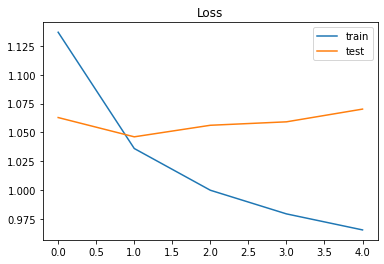

In [185]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

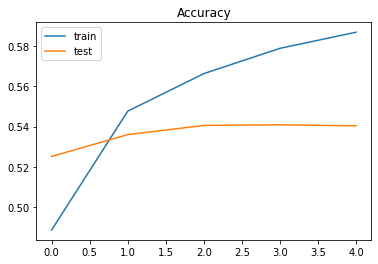

In [186]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

* Σύμφωνα με τα παραπάνω διαγράμματα το μοντέλα μας όδευε προς overfitting των δεδομένων μας,οπότε η μάθηση έχει σταματήσει στο 4o epoch, καθώς όπως φαίνεται και παραπάνω δεν αλλάζει το val_loss για το training dataset.Οπότε δίκαιως έγινε η χρήση του callback για τον έλεγχο του validation loss

* Θα χρησιμοποιοίσουμε μια διαφορετική τεχνική εισάγοντας ένα καινούργιο layer.
     * *SpatialDropout1D*: Για να αποφύγουμε overfitting,αντι για Dropout θα χρησιμοποιείσουμε SpatialDropout1D το οποίο πετάει ολόκληρο το 1D feature map όμως χρησιμοποεί την κάθε είσοδο σαν ξεχωριστό δεδομένο.


In [139]:
from tensorflow.keras import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import optimizers
epochs = 10
batch_size = 17


history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
44123/44123 [==============================] - 16119s 365ms/step - loss: 1.0768 - accuracy: 0.5070 - val_loss: 1.0181 - val_accuracy: 0.5380
Epoch 2/10
44123/44123 [==============================] - 15957s 362ms/step - loss: 0.9777 - accuracy: 0.5630 - val_loss: 1.0025 - val_accuracy: 0.5467
Epoch 3/10
44123/44123 [==============================] - 19541s 443ms/step - loss: 0.9390 - accuracy: 0.5845 - val_loss: 1.0037 - val_accuracy: 0.5495
Epoch 4/10
44123/44123 [==============================] - 29181s 661ms/step - loss: 0.9127 - accuracy: 0.5987 - val_loss: 1.0172 - val_accuracy: 0.5476
Epoch 5/10
44123/44123 [==============================] - 16028s 363ms/step - loss: 0.8945 - accuracy: 0.6079 - val_loss: 1.0281 - val_accuracy: 0.5472


In [152]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))


6512/6512 [==============================] - 673s 103ms/step - loss: 1.0264 - accuracy: 0.5474
Test set
  Loss: 1.197
  Accuracy: 0.524


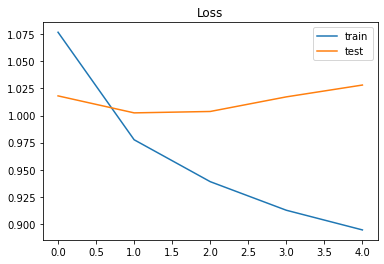

In [153]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

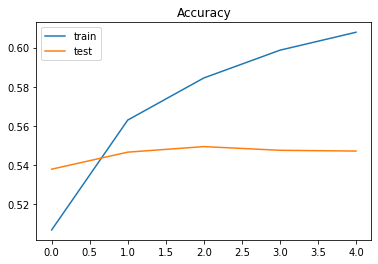

In [154]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

* Φαίνεται πως την ίδια λογική αποτελεί η δεύτερη προσπάθεια του μοντέλου μας με σχετικό ίδιο accuracy.Τελικά μάλλον δεν είναι εύκολη διαδικασία να γίνει η κατηγοροποίηση των ομιλιών μιας ολομέλειας στην ελληνική βουλή καθώς όπως είδαμε τα μοντέλα μπερδεύει μεταξύ πολιτικά κόμματα τα όποια τελικά μάλλον έχουν μια κοινή πορεία και μάλλον τελικά δεν αποτελούν μεγάλη διαφορά στα πιστεύον τους.
* Τελικά μάλλον καλύτερη επιλογή όσο αφορά ένα πρόβλημα text classification για τα δεδομένα της ελληνικής βουλής,είναι κάποια μη νευρωνικά δίκτυα τα όποια είναι εύκολα αρχικά στον διαχειρισμό , απαιτούν λιγότερο χρόνο για να βρουν λύσεις και μας δίνουν μια ξεκάθαρη λύση.
* Ωστόσο γενικώς μην ξεχνάμε κάποιες παραμέτρους που έχουμε πάρει απο πιο πριν όπως τα ονόματα που έχουν αλλάξει κόμματα, το ότι το μοντέλο δεν μπορούσε να διαχωρίσει ορισμένα κόμματα σωστά, ο πολιτικός λόγος ίσως να έχει μια κοινή βάση ανεξαρτήτως των κομμάτων δηλαδή να υπάρχει μια κοινή γλώσσσα.Μην ξεχνάμε πως τα δεδομένα είναι απο το 1989 μέχρι και το 2019.
* Πάντως παραπάνω epochs δεν θα βοηθήσουν

# Text generation

* Συνεχίζουμε δοκιμάζοντας αν μπορουμε να βγάλουμε ένα σύστημα το οποίο θα βγάζει λόγους όπως τους παραπάνω
* Αρχικά διαβάζουμε πάλι τα δεδομένα μας

In [29]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing


In [30]:
data_re = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv')

* Θα δοκιμάσουμε για τον τωρινό πρωθυπουργό Κυριάκο Μητσοτάκη, στα χρονικά πλαίσια του 2015 με 2018 που ήταν ο αρχηγός κόμματος της αντιπολήτευσης.

In [31]:
data_re = data_re.loc[data_re['political_party'] == 'νεα δημοκρατια']
data_re = data_re.loc[data_re['member_name'] == 'μητσοτακης κωνσταντινου κυριακος']

* Θα αλλάξουμε τον τύπο της στήλης *sitting_date* ώστε να πάρουμε τις χρονίες


In [32]:
data_re['sitting_date']= data_re['sitting_date'].astype('datetime64[ns]')
data_re['year'] = data_re['sitting_date'].dt.year

* Και μετά θα πάρουμε τις χρονίες 2015 - 2018


In [33]:
data_re = data_re.loc[(data_re['year'] > 2015) & (data_re['year'] < 2019)]

* Θα δημιουργήσουμε ένα string που θα έχει τους λόγους του Μητσοτάκη

In [34]:
text = ''
for i in range(len(data_re)):
    text+=data_re.iloc[i].speech
    
len(text)

1547923

* Στη συνέχεια εισάγουμε τον κώδικα σύμφωνα με τον παρακάτω [*tutorial της tensorflow*](https://www.tensorflow.org/tutorials/text/text_generation) σχετικά με text generation μέσω RNN

In [35]:
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))

147 unique characters


In [36]:
ids_from_chars = preprocessing.StringLookup(vocabulary=list(vocab))

In [37]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True)

In [38]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [39]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1547923,), dtype=int64, numpy=array([  3,  93, 133, ..., 113, 121,   9], dtype=int64)>

In [40]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [41]:
for ids in ids_dataset.take(10):
  print(chars_from_ids(ids).numpy().decode('utf-8'))

 
Κ
υ
ρ
ί
ε
ς
 
κ
α


In [42]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

In [43]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b' ' b'\xce\x9a' b'\xcf\x85' b'\xcf\x81' b'\xce\xaf' b'\xce\xb5'
 b'\xcf\x82' b' ' b'\xce\xba' b'\xce\xb1' b'\xce\xb9' b' ' b'\xce\xba'
 b'\xcf\x8d' b'\xcf\x81' b'\xce\xb9' b'\xce\xbf' b'\xce\xb9' b' '
 b'\xcf\x83' b'\xcf\x85' b'\xce\xbd' b'\xce\xac' b'\xce\xb4' b'\xce\xb5'
 b'\xce\xbb' b'\xcf\x86' b'\xce\xbf' b'\xce\xb9' b',' b' ' b'\xce\xba'
 b'\xcf\x8d' b'\xcf\x81' b'\xce\xb9' b'\xce\xb5' b' ' b'\xce\xa0'
 b'\xcf\x81' b'\xcf\x89' b'\xce\xb8' b'\xcf\x85' b'\xcf\x80' b'\xce\xbf'
 b'\xcf\x85' b'\xcf\x81' b'\xce\xb3' b'\xce\xad' b',' b' ' b'\xce\xb7'
 b' ' b'\xce\xba' b'\xce\xb1' b'\xcf\x84' b'\xce\xac' b'\xcf\x83'
 b'\xcf\x84' b'\xce\xb1' b'\xcf\x83' b'\xce\xb7' b' ' b'\xcf\x83'
 b'\xcf\x84' b'\xce\xb7' b' ' b'\xcf\x87' b'\xcf\x8e' b'\xcf\x81'
 b'\xce\xb1' b' ' b'\xce\xb5' b'\xce\xaf' b'\xce\xbd' b'\xce\xb1'
 b'\xce\xb9' b' ' b'\xcf\x80' b'\xce\xbf' b'\xce\xbb' b'\xcf\x8d' b' '
 b'\xce\xb1' b'\xce\xbd' b'\xce\xb7' b'\xcf\x83' b'\xcf\x85' b'\xcf\x87'
 b'\xce\xb7' b'\xcf\x84'

In [44]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy().decode('utf-8'))

 Κυρίες και κύριοι συνάδελφοι, κύριε Πρωθυπουργέ, η κατάσταση στη χώρα είναι πολύ ανησυχητική. Η κοιν
ωνία βράζει, η οικονομία βυθίζεται, οι θεσμοί δοκιμάζονται και η χώρα κινδυνεύει να μεταβληθεί σε ένα
ν απέραντο καταυλισμό εγκλωβισμένων προσφύγων και μεταναστών.Αντιμέτωποι με αυτήν την πραγματικότητα,
 οι πολιτικοί, κυρίες και κύριοι συνάδελφοι, οφείλουμε να δείχνουμε τη μέγιστη υπευθυνότητα, να ενώνο
υμε την κοινωνία, να προχωράμε με σοβαρό σχέδιο και πάντως να μην προκαλούμε τους πολίτες με τυφλές κ


In [45]:
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

In [46]:
dataset = sequences.map(split_input_target)

In [47]:
for input_example, target_example in  dataset.take(1):
  print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
  print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))

Input :  Κυρίες και κύριοι συνάδελφοι, κύριε Πρωθυπουργέ, η κατάσταση στη χώρα είναι πολύ ανησυχητική. Η κοι
Target: Κυρίες και κύριοι συνάδελφοι, κύριε Πρωθυπουργέ, η κατάσταση στη χώρα είναι πολύ ανησυχητική. Η κοιν


In [48]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [49]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [50]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True, 
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else: 
      return x

In [52]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [53]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [54]:
model.compile(optimizer='adam', loss=loss)

In [56]:
EPOCHS = 40

history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/40
239/239 [==============================] - 678s 3s/step - loss: 3.3515
Epoch 2/40
239/239 [==============================] - 708s 3s/step - loss: 1.8731
Epoch 3/40
239/239 [==============================] - 674s 3s/step - loss: 1.4376
Epoch 4/40
239/239 [==============================] - 504s 2s/step - loss: 1.2482
Epoch 5/40
239/239 [==============================] - 501s 2s/step - loss: 1.1472
Epoch 6/40
239/239 [==============================] - 500s 2s/step - loss: 1.0808
Epoch 7/40
239/239 [==============================] - 501s 2s/step - loss: 1.0318
Epoch 8/40
239/239 [==============================] - 501s 2s/step - loss: 0.9847
Epoch 9/40
239/239 [==============================] - 501s 2s/step - loss: 0.9443
Epoch 10/40
239/239 [==============================] - 501s 2s/step - loss: 0.9069
Epoch 11/40
239/239 [==============================] - 501s 2s/step - loss: 0.8694
Epoch 12/40
239/239 [==============================] - 501s 2s/step - loss: 0.8336
Epoch 13/40
2

In [58]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 149) # (batch_size, sequence_length, vocab_size)


In [59]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature=temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "" or "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['','[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices = skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())]) 
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits] 
    predicted_logits, states =  self.model(inputs=input_ids, states=states, 
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "" or "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [60]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [61]:
import time
start = time.time()
states = None
next_char = tf.constant(['Κύριοι'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()

print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)

print(f"\nRun time: {end - start}")

Κύριοι Υπουργοί, επιτρέψει το κύρος της χώρας μαζί με τον Υπουργό σας!Λ κα περιμένω να δώσετε κάποτε, ψηφίσαμε τον καθηγητικό ΠΑΣ. Όσα το είχατε καταθέσει ως Νέα Δημοκρατία, εμείς, κύριε Τσίπρα; Αυτά για το τι θα είχαμε στοχευμένο εισόδημα. Και το εύχομαι πραγματικά. Βόσει των μικρών θέσημας, προ τον καμμία κυβέρνηση, μία κυβέρνηση που θα ψηφίσετε μόνο ασκείτε την ετυμηγορία του. Και βέβαια τουλάχιστον ένα πλέγμα θα έπρεπε… Μεγάλες κυβερνήσεις, αλλά και το συντομότερο δυνατό, με την εξής επίσημη θέλατε και σήμερα αναγνωρίζει ότι δεν αποδίδειτε ότι το κραυά τους τοποθετηθείτε. Το ίδιο, τελικά που αφορά το ασφαλιστικό. Αλλά αλλά για έναν τοπίο δυναμόν οχέδαι: Εσείς προτάμε. Έχει τριάντα μήνες του προϋπολογισμού που έμπερθουν άμεσα και να παράγετε τα δικά μας πρόταση για το παρόν. Τέλεστα Δυορχίζει για να προοθέσει η ίδια η διαδικασία. Αυτό θα κάναμε! Δεν το κάναμε να υπογράψετε για το προσφυγικό ρήξαμε αυτά τα οποία θα επιβάλετε την τάξη με την επίκαιρη εργασία-και αυτή να αποφύγει στην 

* Το μοντέλο δεν βγάζει τόσο νόημα στην γραφή, ωστόσο καταφέρνει να πιάσει ορισμένα πράγματα όπως το όνομα του πρώην πρωθυπουργού Αλέξη Τσίπρα και φαίνεται πως όντως κάνει κάποια αντιπαράθεση έναντι της τότε κυβέρνησης.Ίσως τελικά η πολιτική είναι ένα δύσκολο πεδίο για να διαχειριστεί ακόμα και ένα νευρωνικό δίκτυο